<a href="https://colab.research.google.com/github/vedapragna/EVA_from_S9/blob/master/EVA4_S11_OneCyclePolicy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Cyclic LR - Triangular Schedule


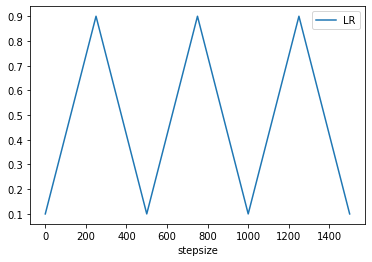

In [14]:
import pandas as pd

df=pd.DataFrame({'stepsize':[0,250,500,750,1000,1250,1500],'LR':[0.1,0.9,0.1,0.9,0.1,0.9,0.1]})
%matplotlib inline
import matplotlib.pyplot as plt

df.plot(x = 'stepsize', y = 'LR')

####Import the Libraries needed.  Import the new Resnet Model & Utility functions needed

In [1]:
# Import Python Packages ; 
import torch
from torchsummary import summary
import torch.optim as optim

#Load the Modules of loading data set(Utils), Train and test functions(Train_Test), Model(resnet)
from Utils import Train_Test 
from Utils import Utils_v1 as Utils
from Models import NewResnet

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


#### Load the dataset, generate data loaders with required data Augmentaions


In [2]:
train_aug_dict = {'Normalise' : [0.5, 0.5] ,
                  'pad' : [40, 40, True, 1.0] ,
                  'Randomcrop' : [32, 32, True, 1.0],
                  'cutout' : [1,8,8, 0.3],
                  'Fliplr' : 0.2}
test_aug_dict = {'Normalise' : [0.5, 0.5] }

trainset, testset = Utils.Get_Cifar10(train_aug_dict,test_aug_dict)

SEED = 1
torch.manual_seed(SEED)

train_loader, test_loader = Utils.DataLoader(trainset, testset, 512, SEED) 
device = Utils.get_device()

Files already downloaded and verified
Files already downloaded and verified


#### New Resnet Architechture Summary

In [3]:
model = NewResnet.CustomResNet().to(device) # Get new resnet model instance
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
      ResnetBlock-14          [-1, 128,

LR Range Test to find the Max LR for One cycle policy. 

In [4]:
import torch.nn as nn
import torch.optim as optim


criterion = nn.CrossEntropyLoss()
curr_lr = 0.03

model = NewResnet.CustomResNet().to(device)
optimizer = optim.SGD(model.parameters(), lr=curr_lr, momentum=0.9,weight_decay=0.003)#,weight_decay=0.002

EPOCHS = 50
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)

    trn_acc,trn_loss = Train_Test.train(model, device, train_loader, optimizer, epoch) #Train_Test.
    test_acc,test_loss = Train_Test.test(model, device, test_loader)

    curr_lr = curr_lr + 0.0008
    optimizer = Utils.update_lr(optimizer, curr_lr)
    

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 4903/10000 (49%)

EPOCH: 1


Loss=1.8088083267211914 Batch_id=97 Accuracy=57.9: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0038, Accuracy: 5861/10000 (59%)

EPOCH: 2


Loss=1.7238024473190308 Batch_id=97 Accuracy=68.4: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6751/10000 (68%)

EPOCH: 3


Loss=1.7306458950042725 Batch_id=97 Accuracy=74.4: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7275/10000 (73%)

EPOCH: 4


Loss=1.6735901832580566 Batch_id=97 Accuracy=77.8: 100%|██████████| 98/98 [00:19<00:00,  4.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7809/10000 (78%)

EPOCH: 5


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7726/10000 (77%)

EPOCH: 6


Loss=1.6335151195526123 Batch_id=97 Accuracy=82.0: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7868/10000 (79%)

EPOCH: 7


Loss=1.5968115329742432 Batch_id=97 Accuracy=83.3: 100%|██████████| 98/98 [00:20<00:00,  4.85it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8040/10000 (80%)

EPOCH: 8


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7843/10000 (78%)

EPOCH: 9


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8097/10000 (81%)

EPOCH: 10


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8444/10000 (84%)

EPOCH: 11


Loss=1.6270173788070679 Batch_id=97 Accuracy=87.0: 100%|██████████| 98/98 [00:19<00:00,  4.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8224/10000 (82%)

EPOCH: 12


Loss=1.6180299520492554 Batch_id=97 Accuracy=87.6: 100%|██████████| 98/98 [00:19<00:00,  4.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7969/10000 (80%)

EPOCH: 13


Loss=1.6098726987838745 Batch_id=97 Accuracy=87.8: 100%|██████████| 98/98 [00:19<00:00,  5.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8225/10000 (82%)

EPOCH: 14


Loss=1.6251057386398315 Batch_id=97 Accuracy=88.6: 100%|██████████| 98/98 [00:19<00:00,  5.05it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8326/10000 (83%)

EPOCH: 15


Loss=1.6019178628921509 Batch_id=97 Accuracy=89.0: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8486/10000 (85%)

EPOCH: 16


Loss=1.5885533094406128 Batch_id=97 Accuracy=89.5: 100%|██████████| 98/98 [00:19<00:00,  5.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8317/10000 (83%)

EPOCH: 17


Loss=1.5942944288253784 Batch_id=97 Accuracy=89.6: 100%|██████████| 98/98 [00:19<00:00,  5.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8386/10000 (84%)

EPOCH: 18


Loss=1.5935273170471191 Batch_id=97 Accuracy=89.5: 100%|██████████| 98/98 [00:19<00:00,  5.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8115/10000 (81%)

EPOCH: 19


Loss=1.5866106748580933 Batch_id=97 Accuracy=89.7: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8237/10000 (82%)

EPOCH: 20


Loss=1.5900804996490479 Batch_id=97 Accuracy=89.8: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8335/10000 (83%)

EPOCH: 21


Loss=1.5821077823638916 Batch_id=97 Accuracy=89.6: 100%|██████████| 98/98 [00:19<00:00,  5.04it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8292/10000 (83%)

EPOCH: 22


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7825/10000 (78%)

EPOCH: 23


Loss=1.5993367433547974 Batch_id=97 Accuracy=89.1: 100%|██████████| 98/98 [00:18<00:00,  5.18it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8330/10000 (83%)

EPOCH: 24


Loss=1.6085915565490723 Batch_id=97 Accuracy=89.7: 100%|██████████| 98/98 [00:19<00:00,  4.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7295/10000 (73%)

EPOCH: 25


Loss=1.5619381666183472 Batch_id=97 Accuracy=89.0: 100%|██████████| 98/98 [00:19<00:00,  5.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 7260/10000 (73%)

EPOCH: 26


Loss=1.5715700387954712 Batch_id=97 Accuracy=89.1: 100%|██████████| 98/98 [00:19<00:00,  5.04it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7992/10000 (80%)

EPOCH: 27


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8271/10000 (83%)

EPOCH: 28


Loss=1.6059365272521973 Batch_id=97 Accuracy=89.3: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7757/10000 (78%)

EPOCH: 29


Loss=1.5903761386871338 Batch_id=97 Accuracy=89.3: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7763/10000 (78%)

EPOCH: 30


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7830/10000 (78%)

EPOCH: 31


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7998/10000 (80%)

EPOCH: 32


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8579/10000 (86%)

EPOCH: 33


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8020/10000 (80%)

EPOCH: 34


Loss=1.5919618606567383 Batch_id=97 Accuracy=89.0: 100%|██████████| 98/98 [00:19<00:00,  4.99it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7783/10000 (78%)

EPOCH: 35


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7741/10000 (77%)

EPOCH: 36


Loss=1.5855497121810913 Batch_id=97 Accuracy=88.8: 100%|██████████| 98/98 [00:19<00:00,  5.00it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7955/10000 (80%)

EPOCH: 37


Loss=1.6049673557281494 Batch_id=97 Accuracy=89.0: 100%|██████████| 98/98 [00:19<00:00,  5.03it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7637/10000 (76%)

EPOCH: 38


Loss=1.5879756212234497 Batch_id=97 Accuracy=88.7: 100%|██████████| 98/98 [00:19<00:00,  5.08it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 7288/10000 (73%)

EPOCH: 39


Loss=1.6110663414001465 Batch_id=97 Accuracy=88.7: 100%|██████████| 98/98 [00:19<00:00,  5.02it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7838/10000 (78%)

EPOCH: 40


Loss=1.5687456130981445 Batch_id=97 Accuracy=88.5: 100%|██████████| 98/98 [00:19<00:00,  4.96it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7417/10000 (74%)

EPOCH: 41


Loss=1.5977051258087158 Batch_id=97 Accuracy=88.6: 100%|██████████| 98/98 [00:19<00:00,  5.05it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 8159/10000 (82%)

EPOCH: 42


Loss=1.6061315536499023 Batch_id=97 Accuracy=88.4: 100%|██████████| 98/98 [00:19<00:00,  5.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0036, Accuracy: 6943/10000 (69%)

EPOCH: 43


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7765/10000 (78%)

EPOCH: 44


Loss=1.5919054746627808 Batch_id=97 Accuracy=88.2: 100%|██████████| 98/98 [00:19<00:00,  5.04it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7470/10000 (75%)

EPOCH: 45


Loss=1.5957075357437134 Batch_id=97 Accuracy=88.8: 100%|██████████| 98/98 [00:19<00:00,  5.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8434/10000 (84%)

EPOCH: 46


Loss=1.5931508541107178 Batch_id=97 Accuracy=88.2: 100%|██████████| 98/98 [00:19<00:00,  5.06it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7894/10000 (79%)

EPOCH: 47


Loss=1.5778132677078247 Batch_id=97 Accuracy=88.4: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7680/10000 (77%)

EPOCH: 48


Loss=1.6105176210403442 Batch_id=97 Accuracy=88.2: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7917/10000 (79%)

EPOCH: 49


Loss=1.5852636098861694 Batch_id=97 Accuracy=88.1: 100%|██████████| 98/98 [00:19<00:00,  5.03it/s]



Test set: Average loss: 0.0034, Accuracy: 7765/10000 (78%)



###Plot Training Accuray vs Learning Rate Graph for LR Range Test

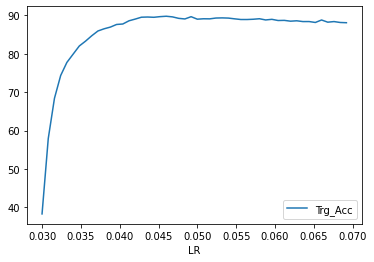

In [6]:
import numpy as np
import pandas as pd

df = pd.DataFrame({"LR":np.arange(0.03,curr_lr-0.0008,0.0008), "Trg_Acc":trn_acc})
df.plot(x = 'LR', y = 'Trg_Acc')

## Max LR and Min LR to implement One cycle policy

In [12]:
print("LR Max: ", df.LR[df.Trg_Acc == max(df.Trg_Acc)])
print("LR Min: ", df.LR[df.Trg_Acc == max(df.Trg_Acc)]/10)

LR Max:  20    0.046
Name: LR, dtype: float64
LR Min:  20    0.0046
Name: LR, dtype: float64


####Train new Resnet Model implemeneting  one cycle policy. Start from Min LR and reach till Max LR by 5th epoch and move back to Min LR by 24th epoch

In [11]:

criterion = nn.CrossEntropyLoss()

LR_max = df.LR[df.Trg_Acc == max(df.Trg_Acc)].reset_index(drop = True)[0]
LR_min = LR_max/10

lr_t = LR_min
import torch.optim as optim
main_model =  NewResnet.CustomResNet().to(device)
optimizer1 = optim.SGD(main_model.parameters(), lr=lr_t, momentum=0.9, weight_decay=0.0018)


EPOCHS = 24
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    trn_acc,trn_loss = Train_Test.train(main_model, device, train_loader, optimizer1, epoch) #Train_Test.
    test_acc,test_loss = Train_Test.test(main_model, device, test_loader)
    if epoch <= 4:
       lr_t = lr_t + (LR_max-LR_min)/4
    else:
        lr_t = lr_t-(LR_max-LR_min)/(EPOCHS-5)
    optimizer1 = Utils.update_lr(optimizer1, lr_t)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0041, Accuracy: 4371/10000 (44%)

EPOCH: 1


Loss=1.9425266981124878 Batch_id=97 Accuracy=47.6: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0039, Accuracy: 5080/10000 (51%)

EPOCH: 2


Loss=1.8264368772506714 Batch_id=97 Accuracy=55.3: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0037, Accuracy: 6178/10000 (62%)

EPOCH: 3


Loss=1.7660048007965088 Batch_id=97 Accuracy=67.5: 100%|██████████| 98/98 [00:20<00:00,  4.74it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 6939/10000 (69%)

EPOCH: 4


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7242/10000 (72%)

EPOCH: 5


Loss=1.7158071994781494 Batch_id=97 Accuracy=75.3: 100%|██████████| 98/98 [00:20<00:00,  4.90it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0035, Accuracy: 7346/10000 (73%)

EPOCH: 6


Loss=1.6672048568725586 Batch_id=97 Accuracy=78.2: 100%|██████████| 98/98 [00:20<00:00,  4.78it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0034, Accuracy: 7545/10000 (75%)

EPOCH: 7


Loss=1.6501579284667969 Batch_id=97 Accuracy=81.0: 100%|██████████| 98/98 [00:20<00:00,  4.82it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8071/10000 (81%)

EPOCH: 8


Loss=1.6388098001480103 Batch_id=97 Accuracy=83.1: 100%|██████████| 98/98 [00:20<00:00,  4.88it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8034/10000 (80%)

EPOCH: 9


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8151/10000 (82%)

EPOCH: 10


Loss=1.6231234073638916 Batch_id=97 Accuracy=85.9: 100%|██████████| 98/98 [00:19<00:00,  4.92it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8304/10000 (83%)

EPOCH: 11


Loss=1.6426446437835693 Batch_id=97 Accuracy=87.1: 100%|██████████| 98/98 [00:19<00:00,  4.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8366/10000 (84%)

EPOCH: 12


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8162/10000 (82%)

EPOCH: 13


Loss=1.5744982957839966 Batch_id=97 Accuracy=88.9: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8352/10000 (84%)

EPOCH: 14


Loss=1.5756056308746338 Batch_id=97 Accuracy=89.9: 100%|██████████| 98/98 [00:19<00:00,  4.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8411/10000 (84%)

EPOCH: 15


Loss=1.5687086582183838 Batch_id=97 Accuracy=90.5: 100%|██████████| 98/98 [00:20<00:00,  4.89it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0033, Accuracy: 8421/10000 (84%)

EPOCH: 16


Loss=1.5709784030914307 Batch_id=97 Accuracy=91.3: 100%|██████████| 98/98 [00:19<00:00,  4.95it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8519/10000 (85%)

EPOCH: 17


Loss=1.5813484191894531 Batch_id=97 Accuracy=92.0: 100%|██████████| 98/98 [00:20<00:00,  4.81it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8566/10000 (86%)

EPOCH: 18


Loss=1.5326147079467773 Batch_id=97 Accuracy=92.5: 100%|██████████| 98/98 [00:19<00:00,  4.97it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8854/10000 (89%)

EPOCH: 19


Loss=1.5345125198364258 Batch_id=97 Accuracy=93.2: 100%|██████████| 98/98 [00:19<00:00,  4.98it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8732/10000 (87%)

EPOCH: 20


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8848/10000 (88%)

EPOCH: 21


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8507/10000 (85%)

EPOCH: 22


Loss=1.5271193981170654 Batch_id=97 Accuracy=94.8: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.0032, Accuracy: 8877/10000 (89%)

EPOCH: 23


Loss=1.504758358001709 Batch_id=97 Accuracy=95.4: 100%|██████████| 98/98 [00:20<00:00,  4.86it/s]



Test set: Average loss: 0.0031, Accuracy: 8976/10000 (90%)

